This notebook deals with the contents in Section 5.2 of the book.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and inspect the data

In [2]:
df = pd.read_csv("./data/data-attendance-2.txt")
print(df.count())
df["ratio"] = df["Y"] / df["M"]
df.head(5)

PersonID    50
A           50
Score       50
M           50
Y           50
dtype: int64


,PersonID,A,Score,M,Y,ratio
0,1,0,69,43,38,0.883721
1,2,1,145,56,40,0.714286
2,3,0,125,32,24,0.750000
3,4,1,86,45,33,0.733333
4,5,1,158,33,23,0.696970


In [3]:
def hist_density_plot(ax, data, col_name):
    sns.histplot(ax=ax, data=data, stat="density", x=col_name, hue="A", multiple="stack")
    sns.kdeplot(ax=ax, data=data, x=col_name, color='k')

def box_swarm_plot(ax, data, col_name):
    sns.boxplot(ax=ax, data=data, x="A", y=col_name, hue="A", dodge=False)
    sns.swarmplot(ax=ax, data=data, x="A", y=col_name, hue="A", size=10, edgecolors='k', linewidth=1)
    
def scatter_plot(ax, data, col_name_x, col_name_y):
    sns.scatterplot(
        ax=ax, 
        data=data, x=col_name_x, y=col_name_y, 
        style="A", hue="A", 
        markers=['o', '^'],
        s=100,
        edgecolor='k', linewidths=10
    )

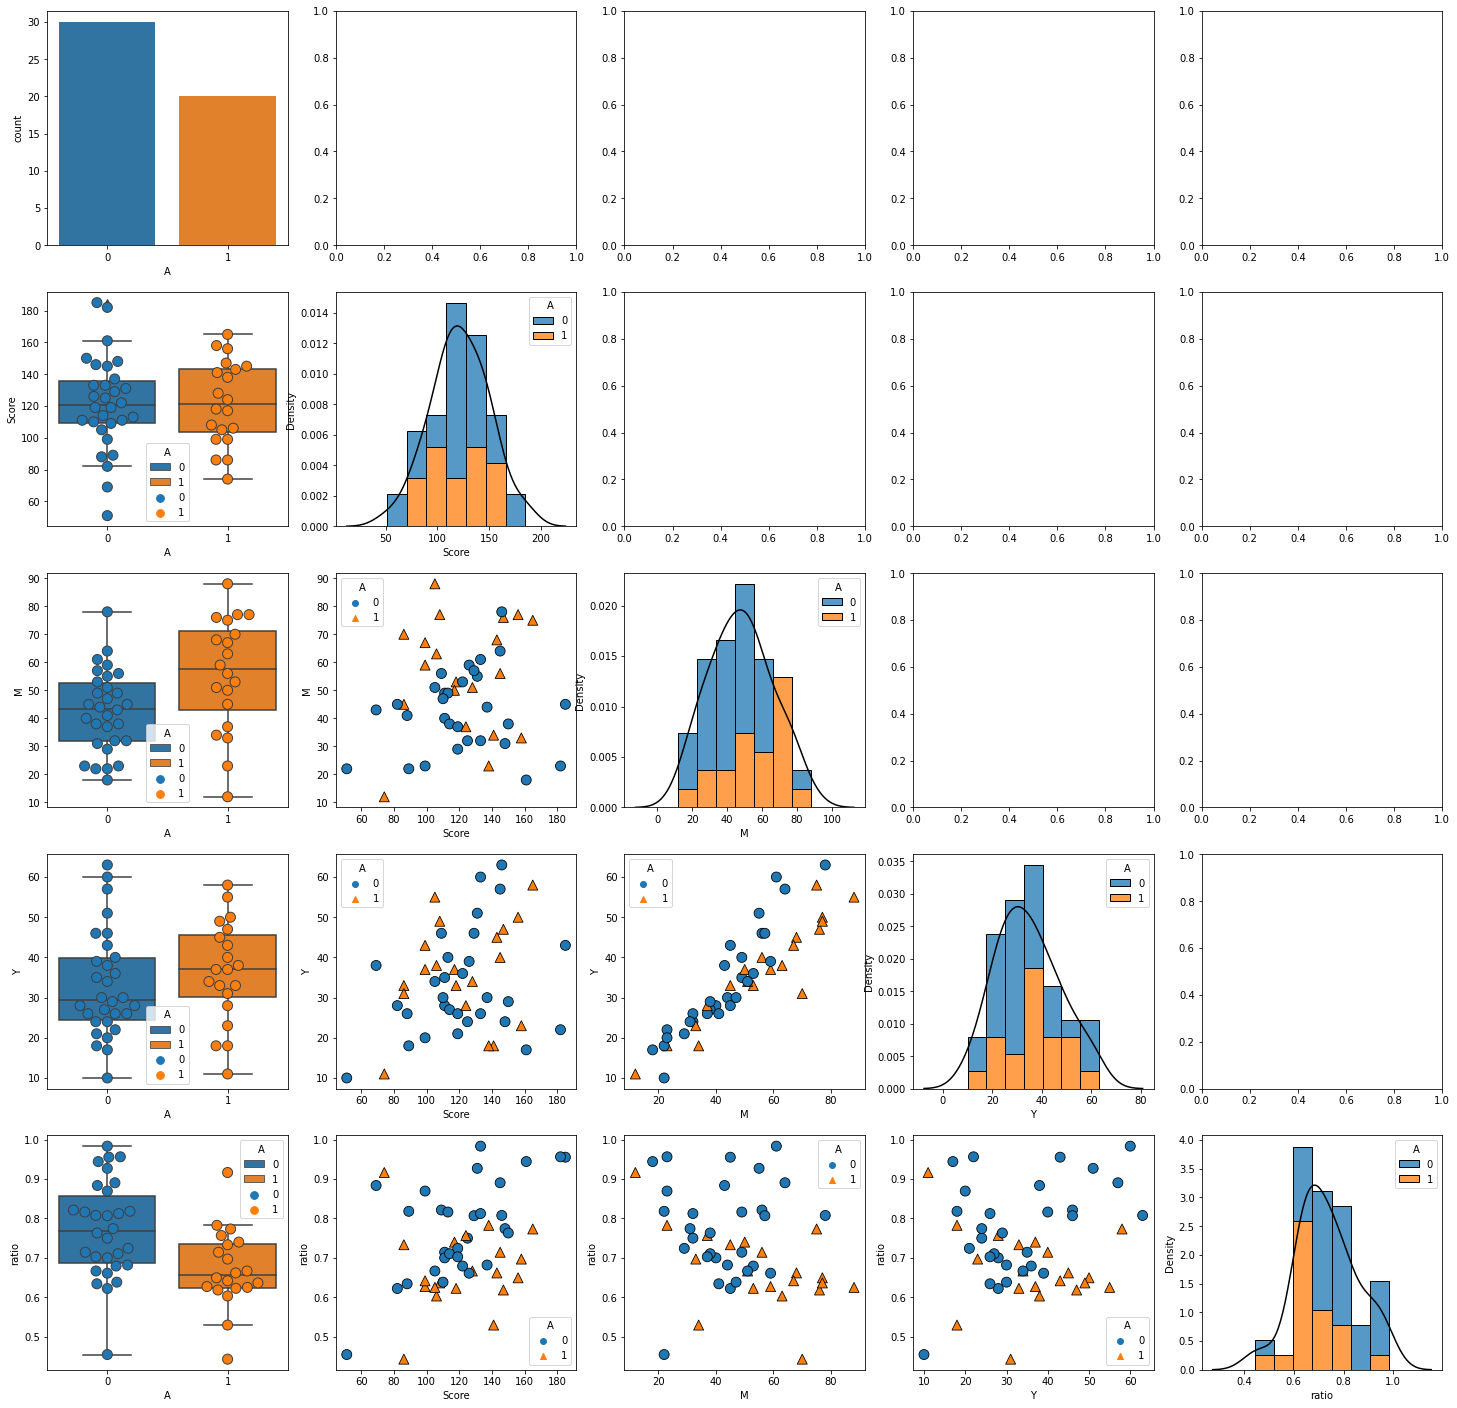

In [4]:
# Fig 5.6
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25,25))

# A
sns.countplot(ax=axes[0, 0], data=df, x="A")

# Score
box_swarm_plot(ax=axes[1, 0], data=df, col_name="Score")
hist_density_plot(ax=axes[1, 1], data=df, col_name="Score")

# M
box_swarm_plot(ax=axes[2, 0], data=df, col_name="M")
scatter_plot(ax=axes[2, 1], data=df, col_name_x="Score", col_name_y="M")
hist_density_plot(ax=axes[2, 2], data=df, col_name="M")

# Y
box_swarm_plot(ax=axes[3, 0], data=df, col_name="Y")
scatter_plot(ax=axes[3, 1], data=df, col_name_x="Score", col_name_y="Y")
scatter_plot(ax=axes[3, 2], data=df, col_name_x="M", col_name_y="Y")
hist_density_plot(ax=axes[3, 3], data=df, col_name="Y")

# ratio
box_swarm_plot(ax=axes[4, 0], data=df, col_name="ratio")
scatter_plot(ax=axes[4, 1], data=df, col_name_x="Score", col_name_y="ratio")
scatter_plot(ax=axes[4, 2], data=df, col_name_x="M", col_name_y="ratio")
scatter_plot(ax=axes[4, 3], data=df, col_name_x="Y", col_name_y="ratio")
hist_density_plot(ax=axes[4, 4], data=df, col_name="ratio")

fig.show()

# Run Stan

In [5]:
model = CmdStanModel(stan_file="model/model5-4.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/chapter05/model/model5-4


CmdStanModel: name=model5-4
	 stan_file=/workdir/chapter05/model/model5-4.stan
	 exe_file=/workdir/chapter05/model/model5-4
	 compiler_optons=stanc_options=None, cpp_options=None


In [6]:
data = {
    "N" : len(df),
    "A" : df["A"].values,
    "M" : df["M"].values,
    "Score" : df["Score"].values/200,
    "Y" : df["Y"].values
}

In [7]:
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 2


# Inspect the result

In [8]:
print(type(fit))
print(fit)

<class 'cmdstanpy.stanfit.CmdStanMCMC'>
CmdStanMCMC: model=model5-4 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmpsfdjc42e/model5-4-202010271133-1-uv_j59j2.csv
	/tmp/tmpsfdjc42e/model5-4-202010271133-2-acak6ria.csv
	/tmp/tmpsfdjc42e/model5-4-202010271133-3-t_b7th0d.csv
	/tmp/tmpsfdjc42e/model5-4-202010271133-4-3ugjqsp6.csv
 output_files:
	/tmp/tmpsfdjc42e/model5-4-202010271133-1-uv_j59j2-stdout.txt
	/tmp/tmpsfdjc42e/model5-4-202010271133-2-acak6ria-stdout.txt
	/tmp/tmpsfdjc42e/model5-4-202010271133-3-t_b7th0d-stdout.txt
	/tmp/tmpsfdjc42e/model5-4-202010271133-4-3ugjqsp6-stdout.txt


In [9]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 110)


In [10]:
fit.stan_variables()

{'b1': array([-0.167099, -0.173514, -0.243371, ...,  0.188474,  0.193284,
         0.227155]),
 'b2': array([-0.511755, -0.512138, -0.513854, ..., -0.557611, -0.484901,
        -0.495945]),
 'b3': array([2.35431, 2.35483, 2.35808, ..., 1.65055, 1.52425, 1.69962]),
 'q': array([[0.655914, 0.736532, 0.786565, ..., 0.831827, 0.730721, 0.619288],
        [0.654506, 0.735285, 0.785541, ..., 0.830983, 0.729508, 0.617746],
        [0.638801, 0.721594, 0.773893, ..., 0.821301, 0.715832, 0.601094],
        ...,
        [0.6809  , 0.695828, 0.772075, ..., 0.806337, 0.732137, 0.610136],
        [0.67242 , 0.692847, 0.758769, ..., 0.791909, 0.72067 , 0.613699],
        [0.69286 , 0.723809, 0.784049, ..., 0.817854, 0.744306, 0.639345]]),
 'y_pred': array([[24., 52., 25., ..., 32., 18., 35.],
        [30., 43., 21., ..., 34., 20., 40.],
        [27., 43., 24., ..., 31., 16., 37.],
        ...,
        [25., 44., 27., ..., 32., 18., 45.],
        [30., 37., 25., ..., 30., 14., 40.],
        [33., 42.

In [11]:
fit_summary = fit.summary()
fit_summary

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-1389.320000,0.030699,1.193100,-1391.660000,-1389.010000,-1388.020000,1510.44,1225.01,1.00154
b1,0.082033,0.005988,0.225321,-0.291777,0.079116,0.451573,1415.74,1148.21,1.00260
b2,-0.622567,0.002178,0.090428,-0.774657,-0.623288,-0.472704,1723.98,1398.20,1.00208
b3,1.922130,0.009642,0.363420,1.332440,1.924560,2.523450,1420.50,1152.06,1.00321
q[1],0.680000,0.000620,0.024000,0.640000,0.680000,0.720000,1543.00,1251.00,1.00000
...,...,...,...,...,...,...,...,...,...
y_pred[46],38.000000,0.054000,3.200000,33.000000,38.000000,43.000000,3501.00,2839.00,1.00000
y_pred[47],14.000000,0.039000,2.300000,10.000000,14.000000,18.000000,3452.00,2800.00,1.00000
y_pred[48],31.000000,0.038000,2.400000,27.000000,31.000000,35.000000,4118.00,3340.00,1.00000


In [12]:
# Check the convergence
fit_summary[fit_summary["R_hat"] >= 1.1]

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,


In [13]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmpsfdjc42e/model5-4-202010271133-1-uv_j59j2.csv, /tmp/tmpsfdjc42e/model5-4-202010271133-2-acak6ria.csv, /tmp/tmpsfdjc42e/model5-4-202010271133-3-t_b7th0d.csv, /tmp/tmpsfdjc42e/model5-4-202010271133-4-3ugjqsp6.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmpsfdjc42e/model5-4-202010271133-1-uv_j59j2.csv, /tmp/tmpsfdjc42e/model5-4-202010271133-2-acak6ria.csv, /tmp/tmpsfdjc42e/model5-4-202010271133-3-t_b7th0d.csv, /tmp/tmpsfdjc42e/model5-4-202010271133-4-3ugjqsp6.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Plot the result

In [14]:
y_pred_percentiles = np.percentile(fit.stan_variable("y_pred"), [10.0, 50.0, 90.0], axis=0)

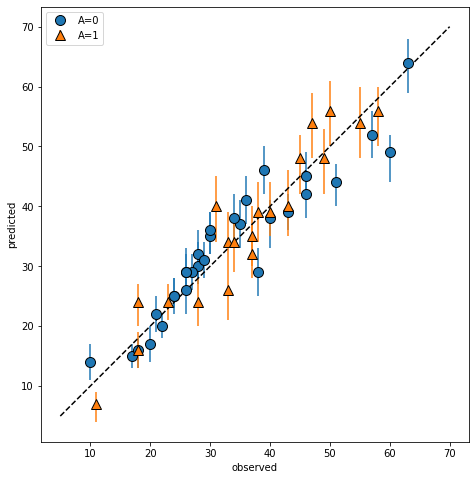

In [15]:
# Fig 5.8
# observation vs. prediction

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

idx0 = np.where(df["A"].values == 0)[0]
idx1 = np.where(df["A"].values == 1)[0]

ax.errorbar(
    x=df["Y"].values[idx0], 
    y=y_pred_percentiles[1][idx0], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx0] - y_pred_percentiles[1][idx0]),
    fmt='o',
    markersize=10,
    markeredgecolor='k',
    label="A=0"
)

ax.errorbar(
    x=df["Y"].values[idx1], 
    y=y_pred_percentiles[1][idx1], 
    yerr=np.abs(y_pred_percentiles[[0, 2]][:, idx1] - y_pred_percentiles[1][idx1]),
    fmt='^',
    markersize=10,
    markeredgecolor='k',
    label="A=1"
)

ax.legend()
ax.plot([5.0, 70.0], [5.0, 70.0], 'k--')
ax.set_aspect("equal")
ax.set_xlabel("observed")
ax.set_ylabel("predicted")
fig.show()